In [1]:
import numpy as np
import matplotlib.pyplot as plt


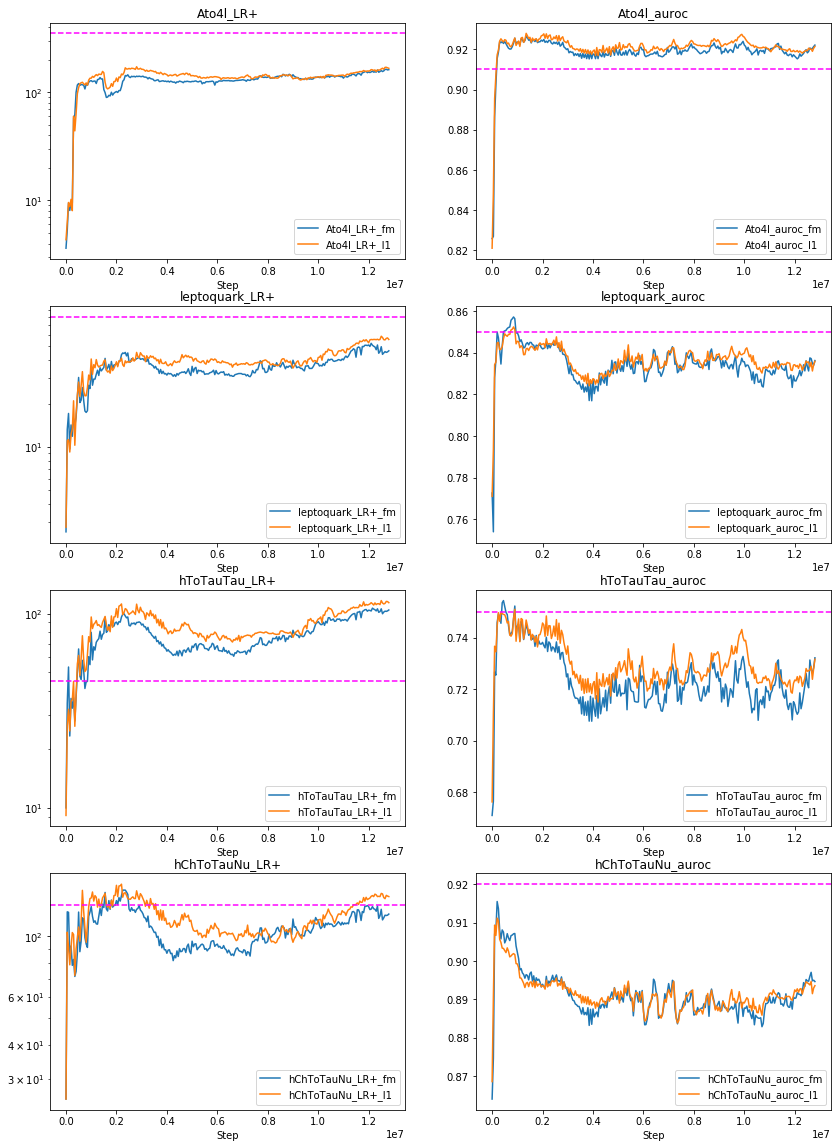

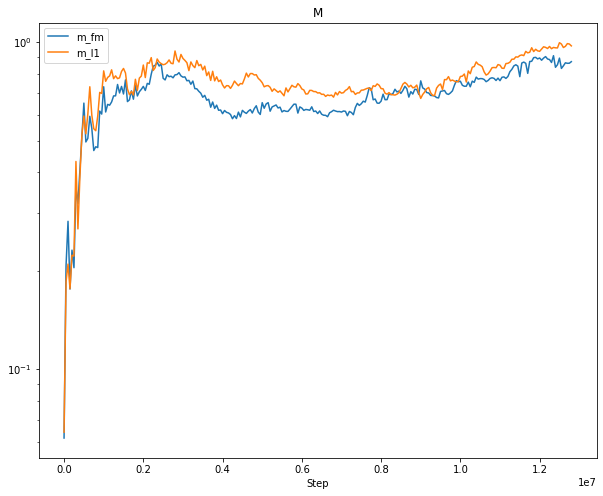

In [3]:
metric_file = '/home/oliverkn/pro/results/4_4/alad/test_datanew/metrics.npy'
#metric_file = '/home/oliverkn/euler/results/hlf_set/alad/0_l18_smmix/metrics.npy'
metric_file = '/home/oliverkn/euler/results/hlf_set/alad/2_nozz/metrics.npy'
metric_file = '/home/oliverkn/euler/results/hlf_set/alad/2_l16_ato4l_2e3/metrics.npy'

vae_lr = {'Ato4l': 350, 'leptoquark': 80, 'hToTauTau': 45, 'hChToTauNu': 130}
vae_auroc = {'Ato4l': 0.91, 'leptoquark': 0.85, 'hToTauTau': 0.75, 'hChToTauNu': 0.92}
bsm_list = ['Ato4l', 'leptoquark', 'hToTauTau', 'hChToTauNu']

metrics = np.load(metric_file, allow_pickle=True).item()
metric_names = metrics.keys()

x_axis = metrics['epoch']

fig, ax_arr = plt.subplots(4, 2, figsize=(14, 20))
for i, name in enumerate(bsm_list):
    # LR+
    ax = ax_arr[i, 0]
    lr_metrics = filter(lambda metric: 'LR+' in metric and name in metric, metric_names)
    for lr_metric in lr_metrics:
        ax.semilogy(x_axis, metrics[lr_metric], label=lr_metric)
        
    ax.axhline(vae_lr[name], ls='--', color='magenta')
    ax.set_title(name + '_LR+')
    ax.set_xlabel('Step')
    ax.legend()
    
    # AUROC
    ax = ax_arr[i, 1]
    lr_metrics = filter(lambda metric: 'auroc' in metric and name in metric, metric_names)
    for lr_metric in lr_metrics:
        ax.plot(x_axis, metrics[lr_metric], label=lr_metric)
        
    ax.axhline(vae_auroc[name], ls='--', color='magenta')
    ax.set_title(name + '_auroc')
    ax.set_xlabel('Step')
    ax.legend()
    
# m
m_metrics = filter(lambda metric: 'm_' in metric, metric_names)
fig, ax = plt.subplots(figsize=(10, 8))
for m_metric in m_metrics:
    ax.semilogy(x_axis, metrics[m_metric], label=m_metric)

ax.set_title('M')
ax.set_xlabel('Step')
ax.legend()

plt.show()